 ### Importing the Required Libraries


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Pre-Processing

In [34]:
df = pd.read_csv("bank.csv",sep = ";")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Converting Categorical Data into Numerical Form

In [35]:
z = {'admin':1,'blue-collar':2,'entrepreneur':3,'housemaid':4,'management':5,'retired':6,'self-employed':7,'services':8,'student':9,'technician':10,'unemployed':11,'unknown':12}
df['job'] = df['job'].map(z)


In [36]:
b = {'single':1, 'married':2, 'divorced':3}
df['marital'] = df['marital'].map(b)

In [37]:
c = {'primary':1,'secondary':2,'tertiary':3,'unknown':4}
df['education'] = df['education'].map(c)

In [38]:
d = {'no': 0, 'yes': 1}
df['default'] = df['default'].map(d)

In [39]:
e = {'no': 0, 'yes': 1}
df['housing'] = df['housing'].map(e)

In [40]:
f = {'no': 0, 'yes': 1}
df['loan'] = df['loan'].map(d)

In [41]:
g = {'jan':1,'feb':2,'mar':3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
df['month'] = df['month'].map(g)

In [42]:
h = {'cellular':1,'telephone':2,'unknown':3}
df['contact'] = df['contact'].map(h)

In [43]:
i = {'failure':0,'success':1,'unknown':2,'other':3}
df['poutcome'] = df['poutcome'].map(i)

In [44]:
j = {'no':0,'yes':1}
df['y'] = df['y'].map(j)

In [45]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,11.0,2,1,0,1787,0,0,1,19,10,79,1,-1,0,2,0
1,33,8.0,2,2,0,4789,1,1,1,11,5,220,1,339,4,0,0
2,35,5.0,1,3,0,1350,1,0,1,16,4,185,1,330,1,0,0
3,30,5.0,2,3,0,1476,1,1,3,3,6,199,4,-1,0,2,0
4,59,2.0,2,2,0,0,1,0,3,5,5,226,1,-1,0,2,0


### Checking if there are any null values in the dataset

In [46]:
df.isna().sum()

age            0
job          478
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

### Removing "job" null values

In [47]:
df["job"].fillna(0, inplace = True)

### Checking if the null values have been removed

In [48]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Summary of the DataFrame

In [49]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,5.305463,1.852245,2.231365,0.016810,1422.657819,0.566025,0.152842,1.652289,15.915284,6.166777,263.961292,2.793630,39.766645,0.542579,1.798275,0.115240
std,10.576211,3.409875,0.599650,0.748744,0.128575,3009.638142,0.495676,0.359875,0.901498,8.247667,2.378380,259.856633,3.109807,100.121124,1.693562,0.681946,0.319347
min,19.000000,0.000000,1.000000,1.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,1.000000,2.000000,0.000000,69.000000,0.000000,0.000000,1.000000,9.000000,5.000000,104.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,5.000000,2.000000,2.000000,0.000000,444.000000,1.000000,0.000000,1.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000,2.000000,0.000000
75%,49.000000,8.000000,2.000000,3.000000,0.000000,1480.000000,1.000000,0.000000,3.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,2.000000,0.000000
max,87.000000,12.000000,3.000000,4.000000,1.000000,71188.000000,1.000000,1.000000,3.000000,31.000000,12.000000,3025.000000,50.000000,871.000000,25.000000,3.000000,1.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   float64
 2   marital    4521 non-null   int64  
 3   education  4521 non-null   int64  
 4   default    4521 non-null   int64  
 5   balance    4521 non-null   int64  
 6   housing    4521 non-null   int64  
 7   loan       4521 non-null   int64  
 8   contact    4521 non-null   int64  
 9   day        4521 non-null   int64  
 10  month      4521 non-null   int64  
 11  duration   4521 non-null   int64  
 12  campaign   4521 non-null   int64  
 13  pdays      4521 non-null   int64  
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   int64  
 16  y          4521 non-null   int64  
dtypes: float64(1), int64(16)
memory usage: 600.6 KB


### Coverting 'Job' DataFrame from Float to Integer

In [51]:
df['job'] = df['job'].apply(np.int64)

### Checking whether it has been converted into Integer

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


### Converting Pandas Dataframe into Numpy Arrays

In [53]:
numpy_array = df.to_numpy()

print(type(numpy_array))

<class 'numpy.ndarray'>


In [54]:
numpy_array

array([[30, 11,  2, ...,  0,  2,  0],
       [33,  8,  2, ...,  4,  0,  0],
       [35,  5,  1, ...,  1,  0,  0],
       ...,
       [57, 10,  2, ...,  0,  2,  0],
       [28,  2,  2, ...,  3,  3,  0],
       [44,  3,  1, ...,  7,  3,  0]], dtype=int64)

## Applying Different Types Of Techniques

In [55]:
features = list(df.columns[1:16])
features
X = df[features]
y = df["y"]

In [56]:
from sklearn.model_selection import train_test_split
X = df[['age','job','marital','education','default','housing','loan','contact','day','month','duration','campaign','previous','poutcome']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### 1) Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function for splitting the training and testing data
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation

from sklearn.model_selection import cross_val_score
# Creating Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [58]:
# Accuracy Of Decision Tree

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8647214854111406


In [59]:
clf = DecisionTreeClassifier()
dt_accuracy = cross_val_score(clf, X, y, cv = 10)
print(dt_accuracy)

mean=np.mean(dt_accuracy)
print("Mean Accuracy of Decision Tree:", mean)

[0.86092715 0.87389381 0.86283186 0.86725664 0.86061947 0.83849558
 0.85840708 0.90044248 0.86946903 0.84292035]
Mean Accuracy of Decision Tree: 0.8635263435503722


### 2) Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

rf =RandomForestClassifier(n_estimators=10)

scoresRF=cross_val_score(rf, X, y, cv=10)
print(scoresRF)
meanRF = np.mean(scoresRF)
print("Mean Accuracy of Random Forest is:", meanRF)

[0.87637969 0.89380531 0.87831858 0.8960177  0.90044248 0.90265487
 0.87831858 0.88938053 0.91150442 0.89380531]
Mean Accuracy of Random Forest is: 0.8920627478559847


### Yes, Random Forest performs better than Decision Tree, since it has a higher accuracy of 0.8944 as compared to 0.8644 of Decision Tree.

### 3) KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
# Creating KNN classifier

knn = KNeighborsClassifier(n_neighbors = 10)
# Fit the classifier to the data
knn_scores = cross_val_score(knn, X, y, cv=10)
print(knn_scores)

KNN = np.mean(knn_scores)
print("Mean Accuracy of KNN is:", KNN)

[0.89403974 0.88274336 0.88053097 0.90265487 0.87389381 0.88495575
 0.89159292 0.90044248 0.89159292 0.88053097]
Mean Accuracy of KNN is: 0.8882977788196682


In [62]:
# Loop over K values
neighbors = np.arange(1, 51)
results = []
for k in range(1,51):
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    cvs_scores = cross_val_score(knn, X, y, cv=10)
    score = np.mean(cvs_scores)
    print(score)
    results.append((k, score))
    # Computing training and test data accuracy for different values of K

1
0.8487082185625818
2
0.8787884115727989
3
0.8754688507296489
4
0.885866104045791
5
0.8812195979604993
6
0.8880760514954383
7
0.8843149895485357
8
0.8882977788196683
9
0.887412823067456
10
0.8882977788196682
11
0.8867495946394733
12
0.8852023872316318
13
0.8856429115630311
14
0.8863066283771903
15
0.8869698568051732
16
0.8880765398816152
17
0.8894034851237571
18
0.8869703451913498
19
0.8871915841294029
20
0.8863076051495439
21
0.8867505714118268
22
0.885866104045791
23
0.8867505714118268
24
0.8863076051495439
25
0.889183711344234
26
0.8885204829162514
27
0.8885199945300748
28
0.8889619840200043
29
0.8878562777159156
30
0.8885195061438982
31
0.8871925609017562
32
0.8869713219637031
33
0.888298267205845
34
0.8869713219637031
35
0.8878567661020922
36
0.8876355271640393
37
0.8882987555920216
38
0.8880775166539687
39
0.8878562777159156
40
0.8871925609017562
41
0.8874137998398094
42
0.8878562777159156
43
0.8876350387778625
44
0.8871925609017562
45
0.8878562777159157
46
0.8871920725155794
47

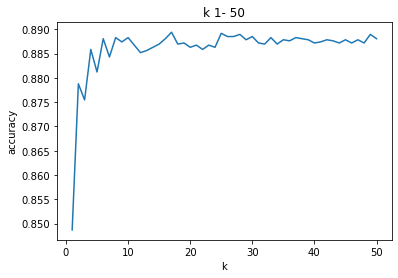

In [63]:
import matplotlib.pyplot as plt 
    
plt.plot([ x[0] for x in results ], [ x[1] for x in results ]) 
    
plt.xlabel('k') 
plt.ylabel('accuracy') 
plt.title('k 1- 50') 
plt.show() 

### No, we could not see a substantial difference, however there is a marginal difference in the accuracy as the value of K changes with minimum accuracy of 0.849 ( at k =1 ) and reaches the maximum accuracy of 0.889 ( at k = 17). The best performance we could get out of KNN is 0.889 at (k = 17).

### 4) Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X, y, cv=10)
print(gnb_scores)
Naive_Bayes = np.mean(gnb_scores)
print("Mean Accuracy of Gaussian NaiveBayes is : ",Naive_Bayes)

[0.86754967 0.8340708  0.86061947 0.85619469 0.86946903 0.88274336
 0.85840708 0.86946903 0.86061947 0.84955752]
Mean Accuracy of Gaussian NaiveBayes is :  0.8608700111352048


In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

from sklearn.naive_bayes import MultinomialNB

mnG=MultinomialNB()

print((cross_val_score(mnG,X_scale,y,cv=10)))
print("Mean Accuracy of Multinomial NaiveBayes is :",cross_val_score(mnG,X_scale,y,cv=10).mean())

[0.88300221 0.88495575 0.88495575 0.88495575 0.88495575 0.88495575
 0.88495575 0.88495575 0.88495575 0.88495575]
Mean Accuracy of Multinomial NaiveBayes is : 0.8847603977417025


### Yes, MultinomialNB (0.884) performs better as its accuracy is slightly higher than GaussianNB (0.860).

In [66]:
# Outcomes

#  Model Name                   Accuracy      Cross Validation
    
# DecisionTreeClassifier         0.864             30-70 Split

# DecisionTreeClassifier         0.864              10-fold
  
# RandomForestClassifier         0.894              10-fold
  
#  KNeighboursClassifier         0.888              10-fold
      
#  KNeighboursClassifier         0.889              10-fold ( with 1:50 K values, we got maximum at K = 17 which is 0.889 )
      
#   Gaussian NaiveBayes           0.860              10-fold
 
# Multinomial NaiveBayes         0.884              10-fold
      
   

### As per the above analysis, Random Forest technique yields the highest accuracy among the other models.